In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# IMPORTS
from tensorflow.python.keras import backend as K
import tensorflow as tf
import pickle
import os
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from time import time
import matplotlib.pyplot as plt
from keras.utils import pad_sequences, to_categorical
from keras.utils.vis_utils import plot_model
from keras.layers import add
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from keras import models
import random

In [31]:
word_to_index, index_to_word, train_cap_dict, test_cap_dict, resnet_test_encoding = None, None, None, None, None

with open('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/word_to_index.pkl', 'rb') as file:
  word_to_index = pickle.load(file)

with open('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/index_to_word.pkl', 'rb') as file:
  index_to_word = pickle.load(file)

with open('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/train_cap_dict.pkl', 'rb') as file:
  train_cap_dict = pickle.load(file)

with open('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/resnet_test_encoding.pkl', 'rb') as file:
  resnet_test_encoding = pickle.load(file)

with open('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/xception_test_encoding.pkl', 'rb') as file:
  xception_test_encoding = pickle.load(file)

with open('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/test_cap_dict.pkl', 'rb') as file:
  test_cap_dict = pickle.load(file)

resnet_model = models.load_model('/content/drive/MyDrive/Information Retrieval Project/saved_models/' + 'resnet_model.h5')
xception_model = models.load_model('/content/drive/MyDrive/Information Retrieval Project/saved_models/' + 'xception_model.h5')

In [11]:
cap_max_len = 0
for img, cap_list in train_cap_dict.items():
  for caption in cap_list:
    temp = len(caption.split())
    if(temp > cap_max_len):
      cap_max_len = temp

In [33]:
def gen_caption(image, model):
  caption = 'sos'

  for i in range(cap_max_len):
    indexes = [word_to_index[key] for key in caption.split() if key in word_to_index]
    indexes = pad_sequences([indexes], maxlen = cap_max_len)
    y_pred = model.predict([image, indexes], verbose = 0)
    y_pred = np.argmax(y_pred)
    word_pred = index_to_word[y_pred]
    caption = caption + ' ' + word_pred
    if word_pred == 'eos':
      break

  return caption

### Resnet

sos a black and black dog is spinning through a grassy yard eos


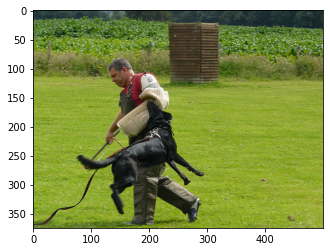

In [21]:
index = random.randint(0, 100)
imageID = list(test_cap_dict.keys())[index]
image = resnet_test_encoding[imageID].reshape((1,2048))
plt.imshow(plt.imread('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/flickr30k_images/flickr30k_images/' + imageID))
caption = gen_caption(image, resnet_model)
print(caption)

In [22]:
test_cap_dict[imageID]

['sos  a man walks while a black dog is trying to bite something on the man s arm  eos',
 'sos  the man is wearing safety gear while he is training the black dog  eos',
 'sos  a black dog is jumping up biting a man s padded arm  eos',
 'sos  a man training a dog to attack his padded left arm  eos',
 'sos  a dog leaps on a man  eos']

In [27]:
sentence_bleu(test_cap_dict[imageID], caption)

0.5388598957209044

In [28]:
bleu_score = 0
for imageID, caption_list in test_cap_dict.items():
  image = resnet_test_encoding[imageID].reshape((1, 2048))
  caption = gen_caption(image)
  bleu_score += sentence_bleu(caption_list, caption)

bleu_score /= len(test_cap_dict)

In [30]:
bleu_score

0.5205751190805951

### Xception

sos a man is holding a large truck eos


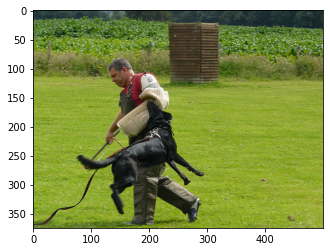

In [34]:
imageID = list(test_cap_dict.keys())[index]
image = xception_test_encoding[imageID].reshape((1,2048))
plt.imshow(plt.imread('/content/drive/MyDrive/Information Retrieval Project/flickr dataset/flickr30k_images/flickr30k_images/' + imageID))
caption = gen_caption(image, xception_model)
print(caption)

In [35]:
test_cap_dict[imageID]

['sos  a man walks while a black dog is trying to bite something on the man s arm  eos',
 'sos  the man is wearing safety gear while he is training the black dog  eos',
 'sos  a black dog is jumping up biting a man s padded arm  eos',
 'sos  a man training a dog to attack his padded left arm  eos',
 'sos  a dog leaps on a man  eos']

In [36]:
sentence_bleu(test_cap_dict[imageID], caption)

0.6189006775371436

In [37]:
bleu_score = 0
for imageID, caption_list in test_cap_dict.items():
  image = resnet_test_encoding[imageID].reshape((1, 2048))
  caption = gen_caption(image, xception_model)
  bleu_score += sentence_bleu(caption_list, caption)

bleu_score /= len(test_cap_dict)

In [38]:
bleu_score

0.4568701490110722